# Pacotes

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

tf.config.experimental.enable_op_determinism()


# Importa Dados

In [ ]:
# Carregar os dados
data = pd.read_csv("PETR4.SA.csv")

# CORREÇÃO: Inverter ordem com sort_values() - Data mais recente no início
data = data.sort_values(by='Date', ascending=False).reset_index(drop=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-14,30.280001,30.680000,30.260000,30.360001,30.360001,6821400
1,2022-01-13,29.530001,30.629999,29.500000,30.320000,30.320000,76717500
2,2022-01-12,28.950001,29.910000,28.950001,29.719999,29.719999,81378200
3,2022-01-11,28.100000,29.070000,27.850000,28.990000,28.990000,62315600
4,2022-01-10,27.990000,28.240000,27.719999,28.010000,28.010000,37455200
...,...,...,...,...,...,...,...
244,2021-01-20,28.950001,29.120001,28.110001,28.209999,22.928862,60306200
245,2021-01-19,28.480000,28.860001,27.639999,28.690001,23.319004,61656000
246,2021-01-18,28.309999,28.850000,28.010000,28.070000,22.815071,68855700
247,2021-01-15,29.049999,29.080000,28.030001,28.120001,22.855711,80673300


# Cria DF

In [ ]:
# Criar as features e o target
fechamento = data["Close"].values
fechamento_anterior = data['Close'].shift(-1)

data_analise = pd.DataFrame({"fechamento": fechamento, "fechamento_anterior": fechamento_anterior})
data_analise.dropna(inplace=True)

In [ ]:
data_analise

,fechamento,fechamento_anterior
0,30.360001,30.320000
1,30.320000,29.719999
2,29.719999,28.990000
3,28.990000,28.010000
4,28.010000,28.180000
...,...,...
243,27.549999,28.209999
244,28.209999,28.690001
245,28.690001,28.070000
246,28.070000,28.120001


# Pré-processamento

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(data_analise["fechamento_anterior"].values.reshape(-1, 1))
Y = scaler.fit_transform(data_analise["fechamento"].values.reshape(-1, 1))

In [ ]:
# Dividir em conjunto de treinamento e teste
train_size = 150
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
# Reshape dos dados para RNN
x_train_rnn = X_train.reshape(10, 15, 1)
y_train_rnn = Y_train.reshape(10, 15, 1)
# Test set
x_test_rnn = X_test.reshape(1, 98, 1)
y_test_rnn = Y_test.reshape(1, 98, 1)

In [ ]:
X.shape

(248, 1)

# Modelo LSTM

In [ ]:
# Definir a semente para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# Criar o modelo LSTM
model = Sequential([
    LSTM(units=20, activation = 'relu', return_sequences=True, input_shape=(15, 1)),
    Dense(units=10, activation = 'linear'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compila e Treina

In [ ]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compilar modelo
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo
history = model.fit(x_train_rnn, y_train_rnn, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4172
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4154
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4136
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.4118
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4100
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.4082
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4064
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4046
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4029
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.4011
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3993
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3975
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3958
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3940
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.3923


# Predição

In [ ]:
# Avaliar o modelo
Y_train_pred = model.predict(x_train_rnn)
Y_test_pred = model.predict(x_test_rnn)

# Desnormalizar os dados - previstos
Y_train_pred = Y_train_pred.reshape(Y_train_pred.shape[0],Y_train_pred.shape[1])
Y_train_pred = scaler.inverse_transform(Y_train_pred)

Y_test_pred = Y_test_pred.reshape(Y_test_pred.shape[0],Y_test_pred.shape[1])
Y_test_pred = scaler.inverse_transform(Y_test_pred)

# Desnormalizar os dados - valores reais
y_train_real = y_train_rnn.reshape(y_train_rnn.shape[0], y_train_rnn.shape[1])
y_test_real = y_test_rnn.reshape(y_test_rnn.shape[0], y_test_rnn.shape[1])

y_train_real = scaler.inverse_transform(y_train_real)
y_test_real = scaler.inverse_transform(y_test_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [ ]:
np.ravel(Y_test_pred)

array([25.354233, 26.55065 , 27.447943, 27.90609 , 28.0313  , 27.944298,
       27.836012, 27.43409 , 27.09934 , 26.746859, 26.564594, 26.308355,
       26.070274, 25.915985, 25.831625, 25.826391, 25.738373, 25.360956,
       24.973494, 24.744196, 24.488745, 24.211681, 23.80948 , 23.540691,
       23.16105 , 22.95791 , 22.872902, 22.827045, 22.865332, 22.749409,
       22.770138, 22.802969, 22.836073, 22.890036, 23.03322 , 22.89736 ,
       22.773989, 22.941397, 23.046587, 23.099415, 23.089024, 23.083231,
       23.142687, 23.204763, 23.257694, 23.268215, 23.313107, 23.299679,
       23.278877, 23.187006, 23.050331, 22.860336, 22.699318, 22.722971,
       22.86823 , 22.847027, 22.972437, 22.93885 , 22.958769, 22.890968,
       22.846445, 22.603916, 22.19575 , 21.746029, 21.729925, 21.734575,
       21.472944, 21.452305, 21.474934, 21.559383, 21.823685, 22.304346,
       22.651957, 22.361557, 23.258224, 24.556057, 25.685978, 26.291904,
       26.612432, 26.756683, 26.77511 , 26.888521, 

In [ ]:
from sklearn.metrics import r2_score

r2_score(np.ravel(y_test_real), np.ravel(Y_test_pred))

0.7571800285671234

# Gráfico

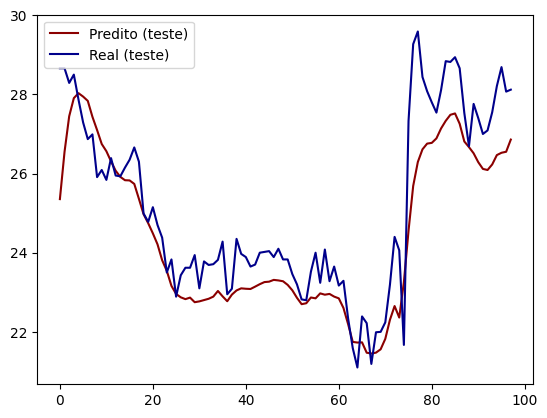

In [ ]:
# Plotar resultados
plt.plot(np.ravel(Y_test_pred), label='Predito (teste)', color='darkred')
plt.plot(np.ravel(y_test_real), label='Real (teste)', color='darkblue')
plt.legend()
plt.show()